In [268]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
import matplotlib.pyplot as plt

In [269]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [271]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

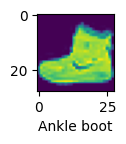

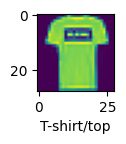

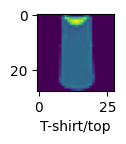

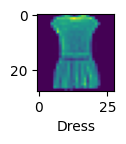

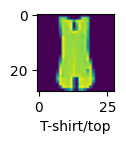

In [272]:
#Show Data
for i in range(5):
  plt.figure(figsize=(1,1))
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i]])
  plt.show()

In [234]:
len(X_test)

10000

In [235]:
X_train.shape

(60000, 28, 28)

In [236]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

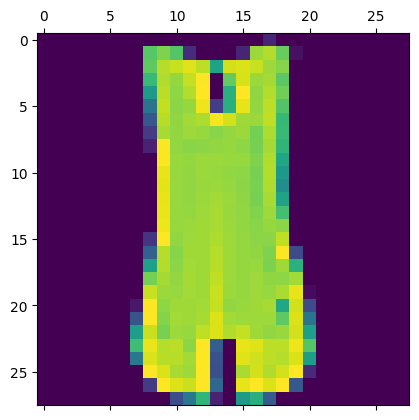

In [237]:
# See Train data at 3rd position
plt.matshow(X_train[4])

In [238]:
# See target data at 3rd position
y_train[2]

0

In [239]:
# See target data at first 5th position
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [240]:
# Scalling (at first do without scalling)
X_train=X_train/255
X_test=X_test/255

In [241]:
# Reshape data
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [242]:
# See  the reshaped data
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# ANN

In [243]:
# Build and compile one- hidden layer ANN model
model = Sequential()
model.add(Dense(10,input_shape=(784,),activation='sigmoid'))
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6051 - accuracy: 0.7953
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4633 - accuracy: 0.8416
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4362 - accuracy: 0.8503
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4219 - accuracy: 0.8547
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4133 - accuracy: 0.8572


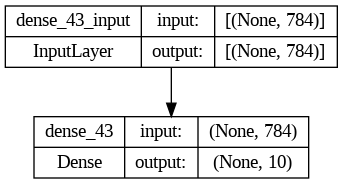

In [244]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [245]:
# Summarize the built model
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


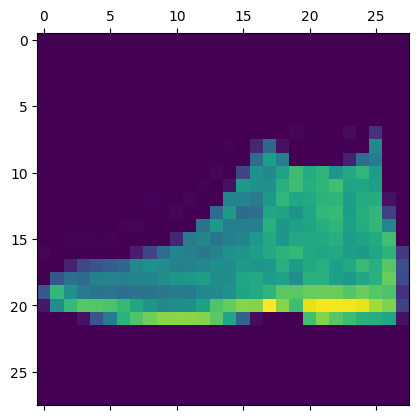

In [246]:
# See the actual test data
plt.matshow(X_test[0])

In [247]:
# See the predicted test data
y_predicted=model.predict(X_test_flattened)
# See the score for predicted value
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([7.9447334e-04, 1.5211439e-04, 2.7393166e-02, 5.4306919e-03,
       1.5582887e-02, 9.9172807e-01, 4.4462498e-02, 9.8912883e-01,
       8.9978373e-01, 9.9880356e-01], dtype=float32)

In [248]:
# See the predicted value
np.argmax(y_predicted[0])

9

In [249]:
# See predicted value
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[9, 2, 1, 1, 6]

In [250]:
# See actual value
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [251]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
y_predict=y_predicted_labels[:len(y_test)]
print('Classification Report:\n',classification_report(y_test,y_predict))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_predict))
print('Accuracy Score:',accuracy_score(y_test,y_predict))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1000
           1       0.97      0.96      0.96      1000
           2       0.74      0.72      0.73      1000
           3       0.85      0.86      0.85      1000
           4       0.74      0.73      0.74      1000
           5       0.96      0.90      0.93      1000
           6       0.60      0.62      0.61      1000
           7       0.91      0.94      0.92      1000
           8       0.92      0.95      0.94      1000
           9       0.92      0.96      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Confusion Matrix:
 [[800   4  13  44   6   0 118   0  15   0]
 [  3 959   5  22   5   0   4   0   2   0]
 [ 17   5 716   8 129   1 111   0  13   0]
 [ 28  17  15 856  27   0  51   0   6   0]
 [  0   2 107  39 731   0 

Text(58.222222222222214, 0.5, 'Truth')

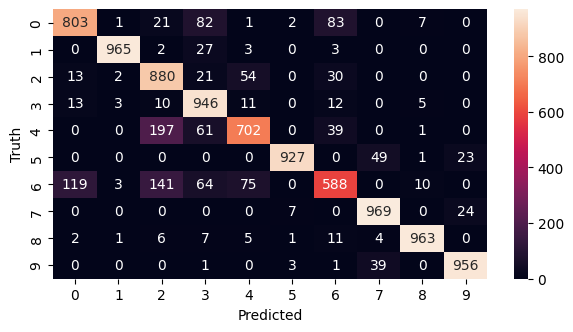

In [252]:
# See the heat plot
import seaborn as sn
plt.figure(figsize=(7,3.5))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# CNN

In [273]:
input_shape = (28, 28, 1)

X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_train=X_train / 255.0
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_test=X_test/255.0

In [274]:
batch_size = 64
num_classes = 10
epochs = 5

In [275]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], shape=(10,), dtype=float32)


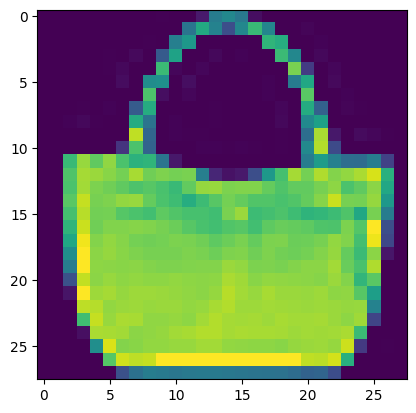

In [276]:
plt.imshow(X_train[100][:,:,0])
print(y_train[100])

In [277]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

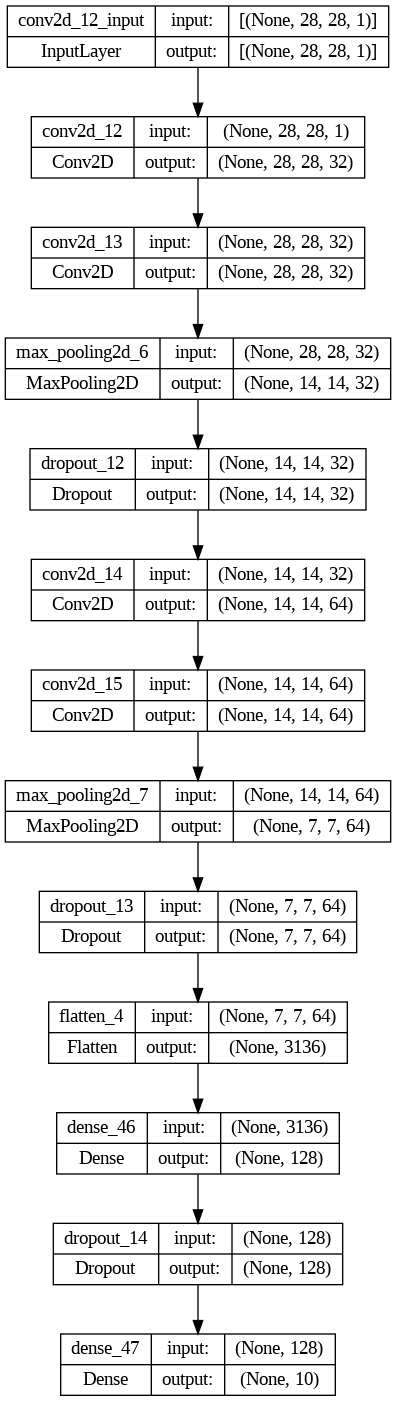

In [284]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [278]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [279]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/5
844/844 [==============================] - 360s 425ms/step - loss: 0.5393 - acc: 0.8118 - val_loss: 0.3031 - val_acc: 0.8878
Epoch 2/5
844/844 [==============================] - 352s 417ms/step - loss: 0.3317 - acc: 0.8833 - val_loss: 0.2854 - val_acc: 0.8902
Epoch 3/5
844/844 [==============================] - 353s 418ms/step - loss: 0.2926 - acc: 0.8974 - val_loss: 0.2439 - val_acc: 0.9092
Epoch 4/5
844/844 [==============================] - 352s 418ms/step - loss: 0.2776 - acc: 0.9025 - val_loss: 0.2497 - val_acc: 0.9083
Epoch 5/5
844/844 [==============================] - 351s 415ms/step - loss: 0.2639 - acc: 0.9081 - val_loss: 0.2651 - val_acc: 0.9075


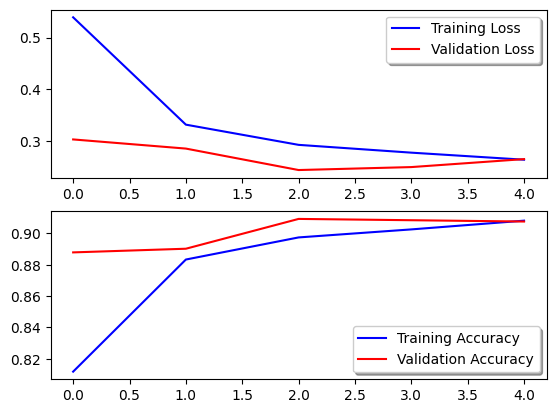

In [280]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [281]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 17s 53ms/step - loss: 0.2790 - acc: 0.9026


In [282]:
# Predict the values from the testing dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)

313/313 [==============================] - 18s 58ms/step


<Axes: >

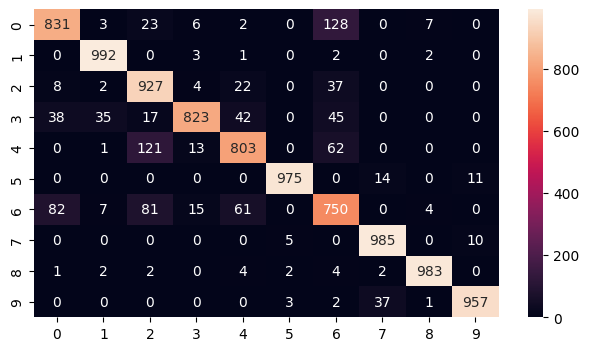

In [283]:
plt.figure(figsize=(7.5, 4))
sns.heatmap(confusion_mtx, annot=True, fmt='g')